In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [49]:
df_tweets = pd.read_csv("../../Data/QMEF/tweet_analysis.csv", sep=";", encoding='utf8')
df_tweets.dtypes
df_tweets['CreatedAt'] = pd.to_datetime(df_tweets['CreatedAt'])
df_tweets['UTC'] = pd.to_datetime(df_tweets['UTC'])
df_tweets['Date'] = df_tweets['UTC'].apply(lambda x: x.date())
df_tweets.drop_duplicates('TweetId', inplace = True)
df_tweets = df_tweets[df_tweets['Favorites'] >= 100000]

In [50]:
df_tweets

,Unnamed: 0,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,...,Mentions,MediaType,MediaURLs,neg,pos,neu,compound,crypto related,year,Date
0,0,1370885153262817283,"Why are you so dogematic, they ask",Elon Musk,elonmusk,2021-03-13 23:51:05+00:00,2021-03-13 23:51:05+00:00,246826,19492,en,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-03-13
2,0,1370882536101056523,Doge day afternoon,Elon Musk,elonmusk,2021-03-13 23:40:41+00:00,2021-03-13 23:40:41+00:00,176305,18884,en,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-03-13
3,0,1368058884837928970,Doge spelled backwards is Egod,Elon Musk,elonmusk,2021-03-06 04:40:30+00:00,2021-03-06 04:40:30+00:00,410295,38848,en,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-03-06
7,0,1366477626429169666,Doge meme shield (legendary item) https://t.co...,Elon Musk,elonmusk,2021-03-01 19:57:08+00:00,2021-03-01 19:57:08+00:00,284931,26875,en,...,0,photo,https://pbs.twimg.com/media/Eva0KLkVkAIE0Mw.jpg,0.000,0.000,1.000,0.0000,True,2021,2021-03-01
9,0,1359519541219500033,"Bought some Dogecoin for lil X, so he can be a...",Elon Musk,elonmusk,2021-02-10 15:08:11+00:00,2021-02-10 15:08:11+00:00,548940,59215,en,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-02-10
10,0,1387290679794089986,The Dogefather SNL May 8,Elon Musk,elonmusk,2021-04-28 06:20:47+00:00,2021-04-28 06:20:47+00:00,465278,80539,en,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-04-28
12,0,1392030108274159619,Do you want Tesla to accept Doge?,Elon Musk,elonmusk,2021-05-11 08:13:35+00:00,2021-05-11 08:13:35+00:00,386790,98651,en,...,0,NaN,,0.000,0.438,0.562,0.4404,True,2021,2021-05-11
15,0,1392974251011895300,Working with Doge devs to improve system trans...,Elon Musk,elonmusk,2021-05-13 22:45:16+00:00,2021-05-13 22:45:16+00:00,512735,84083,en,...,0,NaN,,0.000,0.503,0.497,0.7964,True,2021,2021-05-13
18,0,1359791422711492608,"Frodo was the underdoge, All thought he would ...",Elon Musk,elonmusk,2021-02-11 09:08:33+00:00,2021-02-11 09:08:33+00:00,247531,30383,en,...,0,photo,https://pbs.twimg.com/media/Et7zD1sWYAAFoDq.jpg,0.212,0.000,0.788,-0.5423,True,2021,2021-02-11
19,0,1357244295091208193,"No highs, no lows, only Doge",Elon Musk,elonmusk,2021-02-04 08:27:10+00:00,2021-02-04 08:27:10+00:00,773919,113814,en,...,0,NaN,,0.253,0.401,0.346,0.0721,True,2021,2021-02-04


In [65]:
filepath = "../../Data/QMEF/DOGE-USD.csv"
df = pd.read_csv(filepath)
df['Date'] = pd.to_datetime(df['Date'])
df.drop([1759, 1760], inplace=True) # na-Wert in der vorletzten Zeile. Deshalb die letzten beiden Zeilen entfernt.
df = df[~(df['Date'] < '2020-01-01')]
df = df[~(df['Date'] > '2021-12-31')]
df['Mean_Price'] = (df['Open'] + df['Adj Close'])/2
df['Date'] = df['Date'] = df['Date'].apply(lambda x: x.date())

[datetime.date(2021, 3, 13), datetime.date(2021, 3, 13), datetime.date(2021, 3, 6), datetime.date(2021, 3, 1), datetime.date(2021, 2, 10), datetime.date(2021, 4, 28), datetime.date(2021, 5, 11), datetime.date(2021, 5, 13), datetime.date(2021, 2, 11), datetime.date(2021, 2, 4), datetime.date(2021, 2, 4), datetime.date(2021, 2, 4), datetime.date(2021, 4, 15), datetime.date(2021, 4, 1), datetime.date(2021, 5, 9), datetime.date(2021, 2, 21), datetime.date(2021, 2, 14), datetime.date(2021, 2, 7), datetime.date(2020, 12, 20)]


Text(0, 0.5, '$ Price')

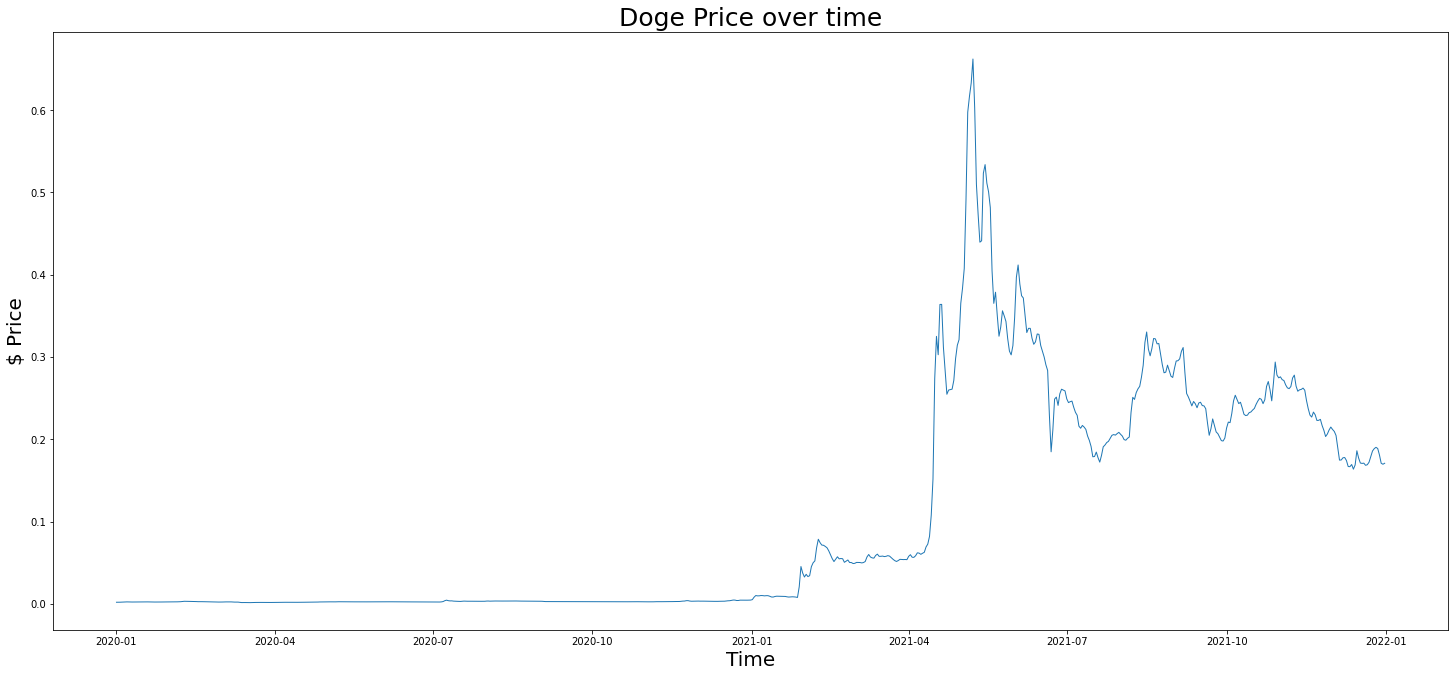

In [66]:
markers_on = list(df_tweets['Date'])
print(markers_on)
plt.figure(figsize = (25, 11))
plt.plot(df["Date"], df["Mean_Price"], markevery=markers_on, lw=1)
plt.title("Doge Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [53]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_Price
783,2020-01-01,0.002028,0.002052,0.002021,0.002033,0.002033,51180941.0,0.002031
784,2020-01-02,0.002034,0.002110,0.001983,0.002009,0.002009,65071106.0,0.002021
785,2020-01-03,0.002008,0.002177,0.001991,0.002145,0.002145,62619988.0,0.002077
786,2020-01-04,0.002144,0.002490,0.002050,0.002241,0.002241,94227582.0,0.002193
787,2020-01-05,0.002240,0.002491,0.002117,0.002419,0.002419,52631740.0,0.002329
...,...,...,...,...,...,...,...,...
1509,2021-12-27,0.189986,0.192923,0.187239,0.187705,0.187705,666773423.0,0.188845
1510,2021-12-28,0.187847,0.187885,0.172738,0.174117,0.174117,954075337.0,0.180982
1511,2021-12-29,0.174095,0.177339,0.166760,0.167765,0.167765,823628336.0,0.170930
1512,2021-12-30,0.168137,0.175771,0.165381,0.171313,0.171313,599236772.0,0.169725
